# Heart Failure Dataset, Pandas, and ML

In [1]:
import pandas as pd

/home/irfan/.local/share/virtualenvs/pandas-IIxn-Q33/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
data.shape

(918, 12)

In [12]:
data_vals = data.values

In [13]:
len(data_vals)

918

In [14]:
data.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [17]:

no_desies = data[data['HeartDisease']==0]

In [25]:
no_desies.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [26]:
diseased = data[data['HeartDisease']==1]
diseased.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


#### let's devide our dataset's columns according to categories
*symptom columns*
-   ChestPainType, RestingBP, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope

*factors columns*
-   Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

our columns which may affect as factores are:
Age, Sex, RestingBP, Cholesterol, FastingBS, MaxHR

In [44]:
# getting by labe
fators_data = data.loc[:,['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']]

In [45]:
fators_data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,40,M,140,289,0,172,0
1,49,F,160,180,0,156,1
2,37,M,130,283,0,98,0
3,48,F,138,214,0,108,1
4,54,M,150,195,0,122,0
...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1
914,68,M,144,193,1,141,1
915,57,M,130,131,0,115,1
916,57,F,130,236,0,174,1


In [46]:
fators_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,40,M,140,289,0,172,0
1,49,F,160,180,0,156,1
2,37,M,130,283,0,98,0
3,48,F,138,214,0,108,1
4,54,M,150,195,0,122,0


In [58]:
diseased_factors = fators_data[fators_data['HeartDisease']!= 0]
# group by age
age_grps = diseased_factors.groupby(by='Age').sum()
age_grps

,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
Age,,,,,
31,120,270,0,153,1
32,213,529,1,257,2
33,100,246,0,150,1
34,255,156,1,334,2
35,476,737,1,556,4
36,230,267,1,285,2
37,140,207,0,130,1
38,1277,1305,3,1627,11
39,228,499,0,290,2


In [61]:
import matplotlib.pyplot as plt
age_grps.index

Int64Index([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
            48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
            65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
           dtype='int64', name='Age')

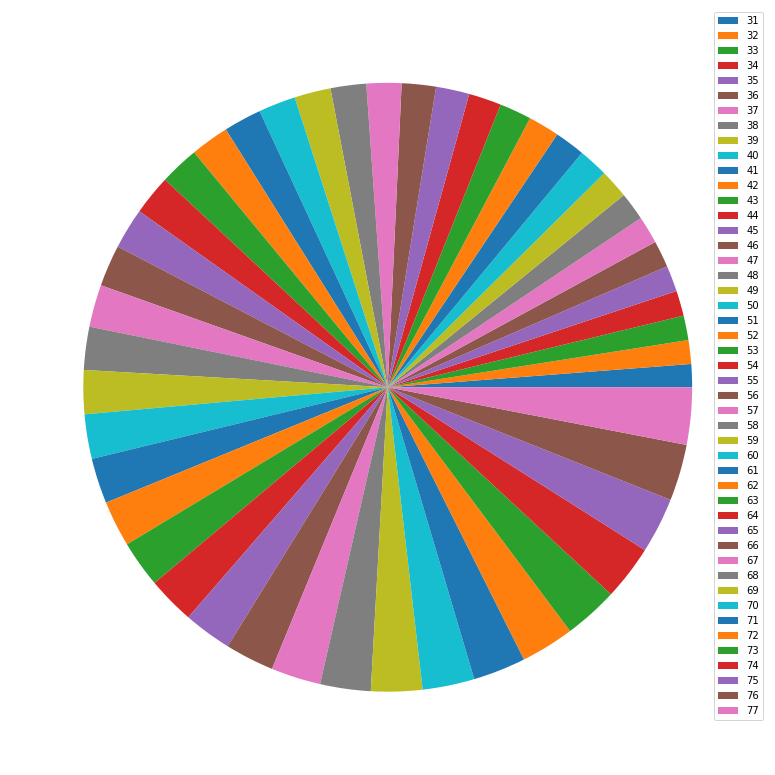

In [71]:
plt.figure(figsize=(14, 14))
plt.pie(age_grps.index)
plt.legend(age_grps.index)
plt.show()